# Chapter 10

In [1]:
cd(homedir()*"/PacktPub/Chp10")
const Chp10 = pwd()

"/Users/malcolm/PacktPub/Chp10"

## Statistical Modelling

In [2]:
using Loess, Plots
gr()

Plots.GRBackend()

In [3]:
x = 10 .* rand(50)
y = 0.1*x .* sin.(x) .+ 0.2 * rand(50)
model = loess(x, y);

In [4]:
u = collect(minimum(x):0.1:maximum(x));
v = Loess.predict(model, u);

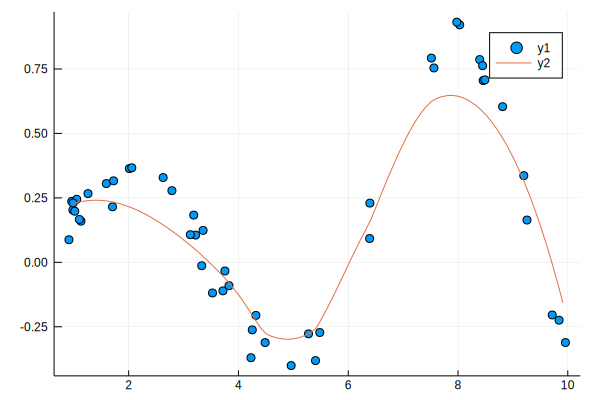

In [5]:
p = scatter(x,y)
plot!(p,u,v)

---

### Loss Functions

In [6]:
using LossFunctions

In [7]:
L2DistLoss()

LPDistLoss{2}()

In [8]:
true_targets = [  1,  0, -2, 1, 1.5] ;
pred_outputs = [0.5,  2, -1, 1, 2];

value(L2DistLoss(), true_targets, pred_outputs)
loss = L2DistLoss()

hcat(value(loss, true_targets, pred_outputs),
     deriv(loss, true_targets, pred_outputs), 
     deriv2(loss,true_targets, pred_outputs))'

3×5 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
  0.25  4.0  1.0  0.0  0.25
 -1.0   4.0  2.0  0.0  1.0 
  2.0   2.0  2.0  2.0  2.0 

---

In [9]:
A = rand(3,4)

3×4 Array{Float64,2}:
 0.29984   0.913642  0.133133   0.21274 
 0.562676  0.292108  0.028324   0.695823
 0.58796   0.83513   0.0357507  0.55852 

In [10]:
B = rand(3,4)

3×4 Array{Float64,2}:
 0.540144  0.238095  0.910246  0.566499
 0.392946  0.137314  0.280408  0.493729
 0.100213  0.838765  0.32797   0.104142

In [12]:
W = [2,1,3,2];

v1 = value(L2DistLoss(), A, B, AvgMode.WeightedSum(W))
v2 = value(L2DistLoss(), A, B, AvgMode.WeightedMean(W))
round.([v1, v2], digits=4)

  likely near /Users/malcolm/.julia/packages/IJulia/4UizY/src/kernel.jl:50
  likely near /Users/malcolm/.julia/packages/IJulia/4UizY/src/kernel.jl:50


2-element Array{Float64,1}:
 4.1327
 0.1722

In [13]:
deriv(L2DistLoss(), A, B)'

4×3 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
  0.480608  -0.33946   -0.975493  
 -1.35109   -0.309589   0.00726991
  1.55423    0.504167   0.584438  
  0.707519  -0.404187  -0.908757  

In [14]:
deriv2(L2DistLoss(), A, B)'

4×3 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 2.0  2.0  2.0
 2.0  2.0  2.0
 2.0  2.0  2.0
 2.0  2.0  2.0

### Clustering

In [ ]:
using RDatasets, Clustering

# Fully qualify as Metalhead (below) as dataset function
iris = RDatasets.dataset("datasets", "iris")
iris[1:5,:]

In [ ]:
features = Matrix(iris[:,[1,2,3,4]])'
result   = kmeans( features, 3)

In [ ]:
fieldnames(KmeansResult)
# [length(features[i,:]) for i in 1:3]

In [ ]:
length(result.assignments) == size(iris)[1]

In [ ]:
result.iterations, result.converged, result.totalcost

In [ ]:
result.assignments'

In [ ]:
using Plots; gr()
scatter(features[1,:], features[2,:], features[4,:], color = result.assignments)

In [ ]:
scatter(features[1,:], features[2,:], features[4,:], color = result.assignments)

In [ ]:
results = [kmeans( features, i) for i = 2:6]
for i in 1:length(results)
    println(i+1, " => ", results[i].totalcost)
end

In [ ]:
result2.iterations, result2.converged, result2.totalcost

In [ ]:
labels = iris[:, 5];
plt = Gadfly.plot(x=Y[:,1], y=Y[:,2], color=labels)

---

### Decision Trees

In [167]:
using DecisionTree
using Random, Statistics

In [168]:
# Create a random dataset
Random.seed!(systime())
X = sort(5 * rand(80))
XX = reshape(X, 80, 1)
y = X .* sin.(X)
y[1:5:end] += 3 * (0.5 .- rand(16))
;

In [169]:
# Fit regression model
regr_1 = DecisionTreeRegressor()
regr_2 = DecisionTreeRegressor(pruning_purity_threshold=0.05)
regr_3 = RandomForestRegressor(n_trees=20)
DecisionTree.fit!(regr_1, XX, y)
DecisionTree.fit!(regr_2, XX, y)
DecisionTree.fit!(regr_3, XX, y)
;

In [170]:
# Predict
X_test = 0:0.01:5.0
y_1 = DecisionTree.predict(regr_1, hcat(X_test))
y_2 = DecisionTree.predict(regr_2, hcat(X_test))
y_3 = DecisionTree.predict(regr_3, hcat(X_test))
;

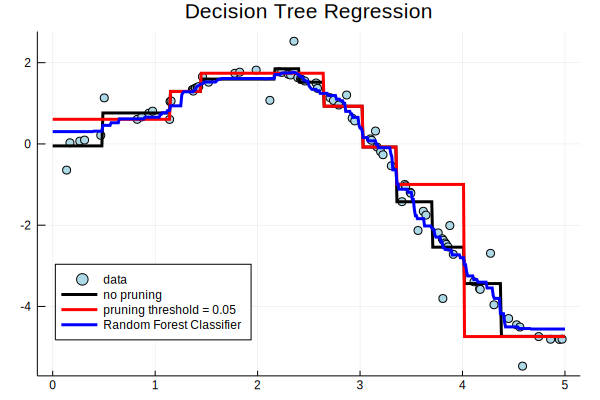

In [171]:
using Plots
gr()
Plots.scatter(X, y, label="data", color="lightblue", legend=:bottomleft)
Plots.plot!(X_test, y_1, color="black", label="no pruning", linewidth=3)
Plots.plot!(X_test, y_2, color="red", label="pruning threshold = 0.05", linewidth=3)
Plots.plot!(X_test, y_3, color="blue", label="Random Forest Classifier", linewidth=3)
Plots.title!("Decision Tree Regression")
